# Workshop week 4: Classification and Regularisation

### Please read the following information about classification, then follow the instructions to complete tasks

## Classification 

Classification in machine learning is the process of categorizing data into predefined groups or classes. It's used for tasks like spam detection, medical diagnosis, and image recognition. A classification model is trained on labeled data, and its goal is to predict the class of new, unseen data points. Common algorithms include logistic regression, decision trees, and neural networks. Evaluation metrics like accuracy and precision help assess the model's performance.

### Case study
Let's explore a simple case study for binary classification using Python. In this scenario, we'll create a classification model to predict whether an email is spam or not based on features extracted from the emails.


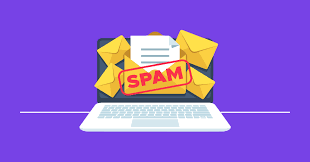

In [ ]:
#Step 1: Data Collection

#We'll use a simplified dataset with email features and labels (0 for not spam and 1 for spam).

import pandas as pd

# Create a DataFrame with email features and labels
data = pd.DataFrame({
    'word_count': [100, 50, 120, 80, 200, 40, 150, 60, 90, 70],
    'has_attachment': [1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    'is_spam': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1] })

In [ ]:
#Step 2: Data Preprocessing

'''
    Before building the classification model, we'll need to split the dataset into features (X) and 
    the target variable (y). 
    Additionally, we'll split the data into training and testing sets.
'''

from sklearn.model_selection import train_test_split

X = data[['word_count', 'has_attachment']]
y = data['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#Step 3: Model Training

# We'll use a simple logistic regression model for binary classification.

from sklearn.linear_model import LogisticRegression

# Create and train the model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
#Step 4: Model Evaluation

# We'll evaluate the model's performance using accuracy as a metric.

from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Step 5: Predictions

#Now that we have a trained model, we can make predictions for new emails. For example:

# Predict whether a new email (word_count=75, has_attachment=1) is spam or not
new_email = [[75, 1]]
prediction = classifier.predict(new_email)
if prediction[0] == 1:
    print("The email is predicted to be spam.")
else:
    print("The email is predicted not to be spam.")

In this case study, we've created a basic binary classification model using logistic regression to predict whether an email is spam or not based on two features (word count and attachment presence). We've also evaluated the model's accuracy and made predictions for new data points.

Resources:


https://www.w3schools.com/ai/ai_mathematics.asp


https://www.datacamp.com/blog/classification-machine-learning

Let's breakdown logistic regression

Logistic regression is a simple yet effective algorithm for binary classification tasks. It's interpretable, computationally efficient, and serves as a good starting point for many classification problems. When dealing with multi-class classification, you can use extensions like multinomial logistic regression or one-vs-all (OvA) techniques.

Logistic regression uses a special function called the sigmoid function (also known as the logistic function) to make predictions. The sigmoid function is defined as:

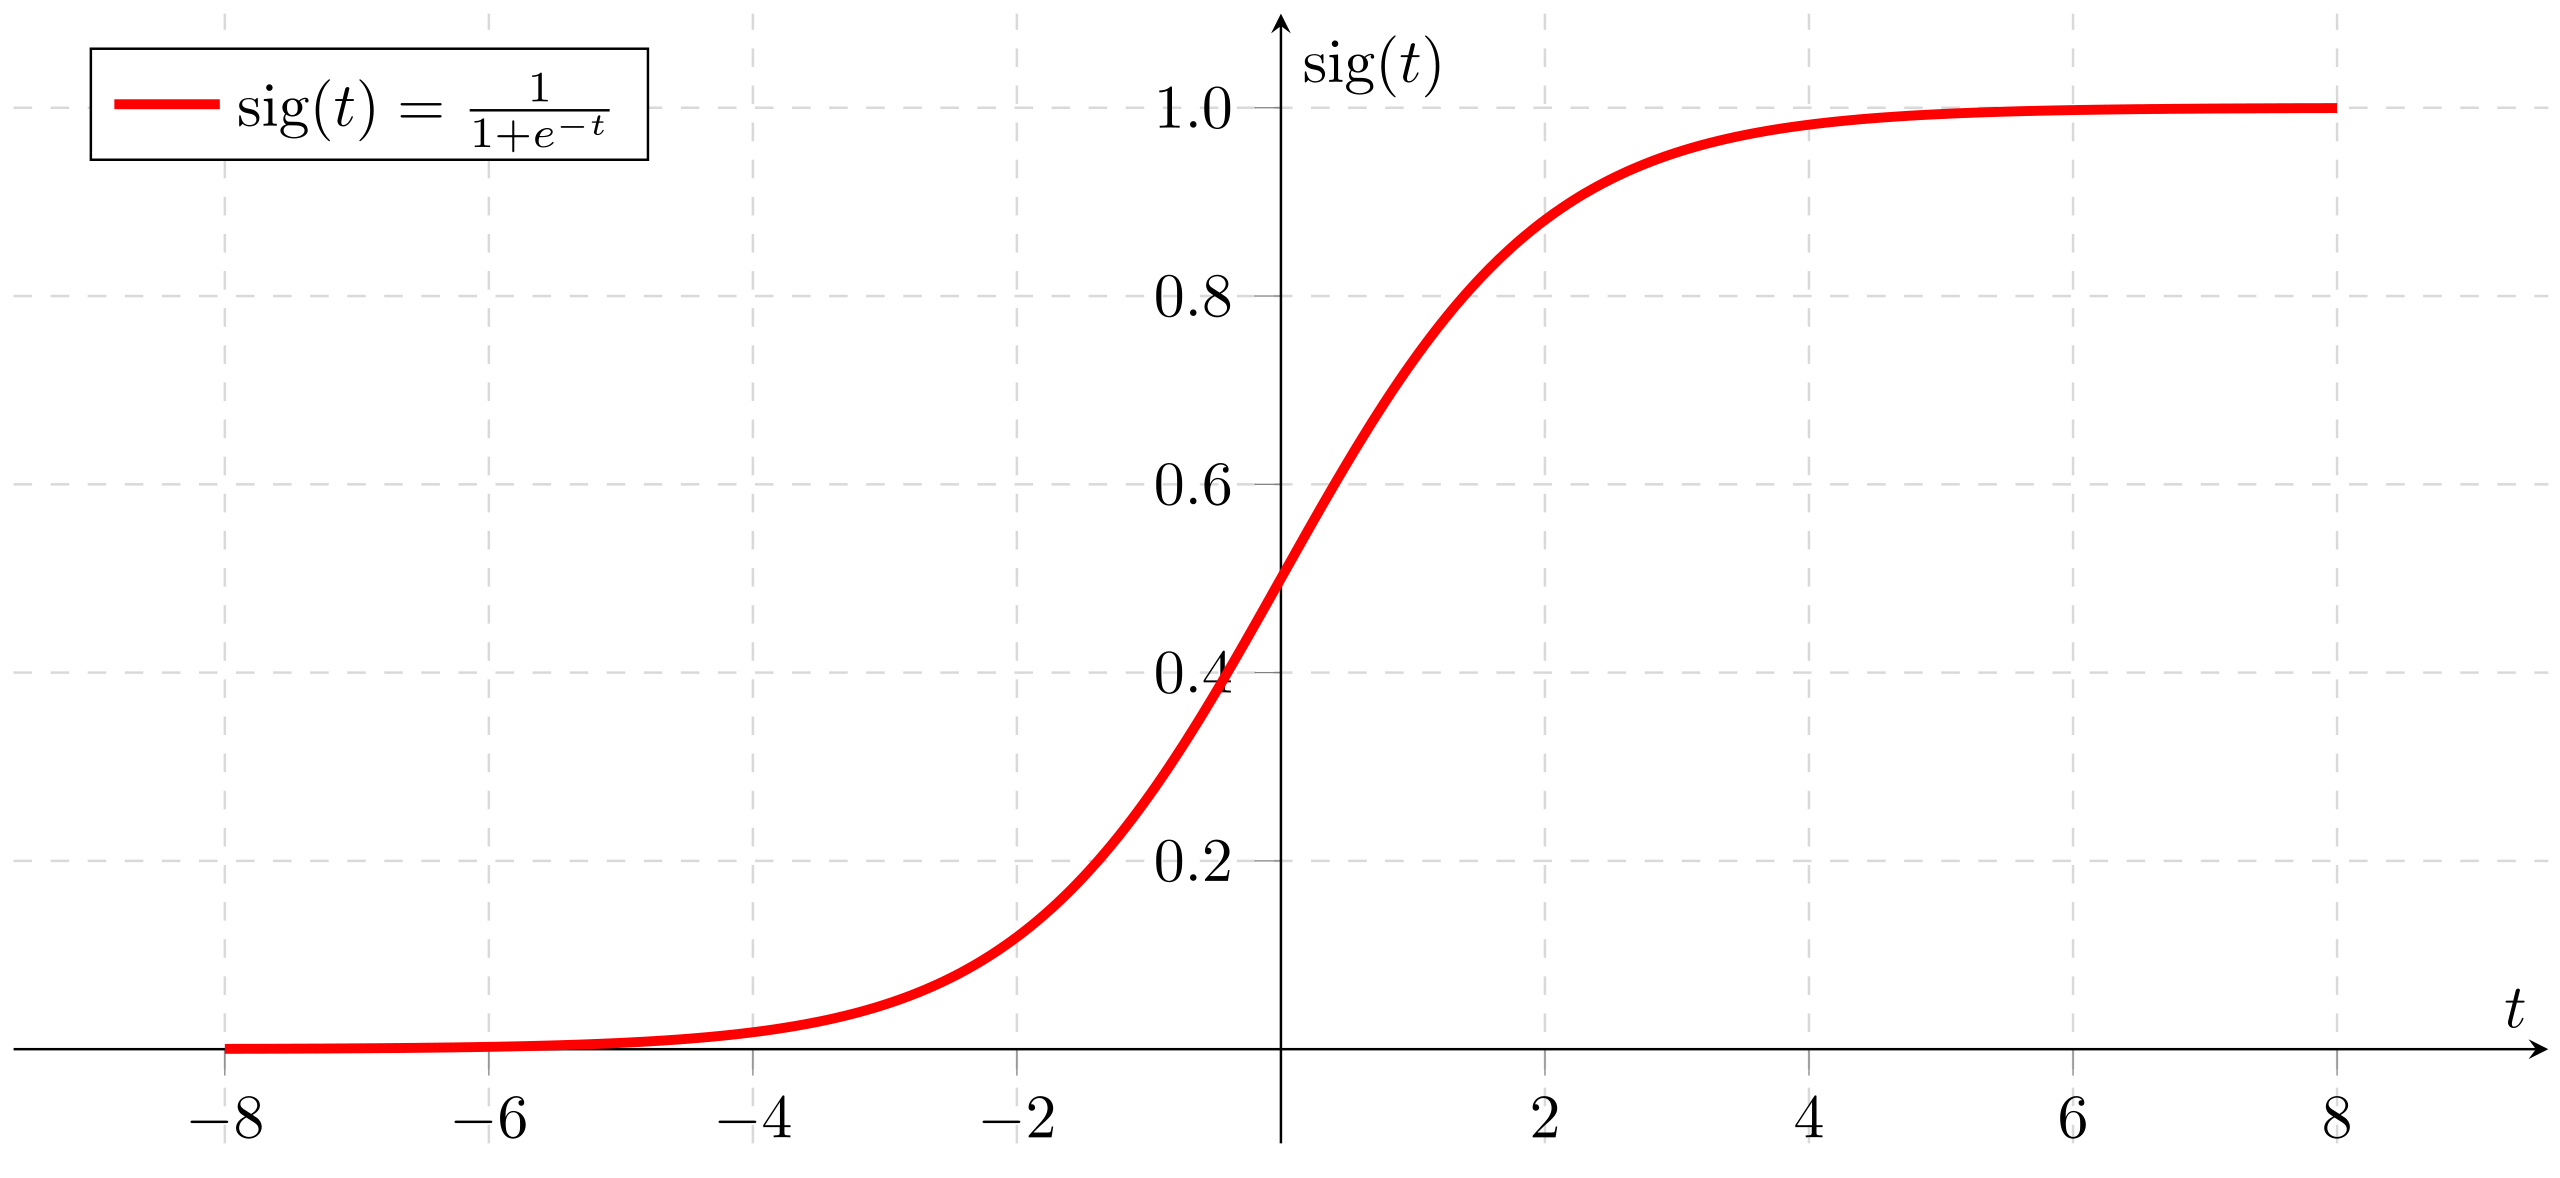


     * sigma is the output of the sigmoid function, which always falls between 0 and 1.
     * t is a linear combination of the input features weighted by model parameters (coefficients).

**1. Sigmoid Function:**

Logistic regression uses a special function called the sigmoid function (σ) to make predictions. The sigmoid function looks like an "S" curve and is defined as:

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

- $\sigma(t)$ represents the output of the sigmoid function.
- $t$ is a linear combination of input features.

**2. Linear Combination:**

$t$ in the sigmoid function is a linear combination of input features $x_1, x_2, \ldots, x_n$ weighted by coefficients $w_1, w_2, \ldots, w_n$, plus a bias term $w_0$:

$$t = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n$$

- $w_0$ is a called bias term. 
- $w_1, w_2, \ldots, w_n$ are weights associated with each feature.

**3. Hypothesis Function:**

The logistic regression model predicts the probability of an example belonging to a particular class (e.g., class 1) using the sigmoid function:

$$h_w(x) = \sigma(t) = \frac{1}{1 + e^{-t}}$$

- $h_w(x)$ predicts the probability that $x$ belongs to the positive class.

**4. Making Predictions:**

To make binary predictions (class 0 or class 1), you set a threshold (e.g., 0.5). If $h_w(x)$ is greater than or equal to the threshold, you predict class 1; otherwise, you predict class 0.

**5. Training Objective - Log Loss:**

During training, the goal is to find the best coefficients $w_0, w_1, w_2, \ldots, w_n$ that minimize a cost function called log loss:

$$J(w) = -\frac{1}{m}\sum_{i=1}^m \left[y^{(i)}\log(h_w(x^{(i)})) + (1 - y^{(i)})\log(1 - h_w(x^{(i)}))\right]$$

- $J(w)$ is the cost function that measures how well the model's predictions match the actual outcomes.
- $m$ is the number of training examples.
- $y^{(i)}$ is the true label of the $i$-th example.
- $x^{(i)}$ is the feature vector of the $i$-th example.
- $h_w(x^{(i)})$ is the predicted probability that $x^{(i)}$ belongs to class 1.

In simple terms, logistic regression uses the sigmoid function to model probabilities, and it aims to find the best coefficients that minimize the difference between predicted probabilities and actual outcomes, resulting in accurate binary classification.

### K-Nearest Neighbors for classification

K-Nearest Neighbors (KNN) is a simple and effective classification algorithm. Here's a brief introduction:

K-Nearest Neighbors is a supervised machine learning algorithm used for classification and regression tasks. In KNN, the prediction for a new data point is determined by the majority class (for classification).

Key Concepts:
**K-Nearest Neighbors:** The "K" in KNN represents the number of nearest neighbors to consider when making predictions. It's a hyperparameter that needs to be chosen before training the model.

**Distance Metric:** KNN relies on a distance metric (usually Euclidean distance) to measure the similarity between data points. The algorithm finds the K-nearest neighbors based on this distance.

**Classification:** For classification tasks, the majority class among the K-nearest neighbors determines the predicted class for a new data point.

### Algorithm Steps:

1) Choose K: Select a value for K, the number of neighbors to consider.

2) Calculate Distances: Compute the distance between the new data point and all other data points in the training set.

3) Identify Neighbors: Identify the K-nearest neighbors based on the calculated distances.

4) Majority Vote (Classification): For classification, assign the class label that is most common among the K-nearest neighbors.

### Task 1: Implement k-NN from scratch.

#### Supply missing code to complete k-NN algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import f1_score

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    # calculate distances betwen training example and given test example x
    def calculate_distances(self, x):
        distances = # your code
        return distances

    # return predictions for all points in X_test
    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            distances = self.calculate_distances(x_test)
            
            # Get indices of K-nearest neighbors
            k_neighbors_indices = # your code
            
            # Get labels of K-nearest neighbors
            k_neighbors_labels = # your code
            
            # Predict the majority class
            prediction = # your code
            
            predictions.append(prediction)
            
        return np.array(predictions)

# Remaing code works without changes, but of course, you can experiment yourself with it.
    
k_neighbors = 5

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train KNN classifier
knn_classifier = KNNClassifier(k=k_neighbors)
knn_classifier.fit(X_train, y_train)

# Make predictions
predictions = knn_classifier.predict(X_test)
print('Micro F1 score = ', f1_score(y_test, predictions, average='micro'))

# Plotting
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='x', s=100, label='Training Points')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=plt.cm.Paired, marker='o', s=100, label='Test Points')

# Highlight decision boundaries
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

plt.title("KNN Classifier")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()


### Task 2: Choosing k

#### Try a few k for k-NN to obtain the best F1 score.
How the decision boundary changed on the chart comparing to the original k?


## Regularisation

Regularization is a technique used in machine learning to prevent overfitting and improve the generalization performance of a model. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which can lead to poor performance on new, unseen data.

There are two common types of regularization: L1 regularization (Lasso) and L2 regularization (Ridge).

L1 adds a penalty based on the absolute values of the coefficients, encouraging sparsity and feature selection. In contrast, L2 adds a penalty based on the squared values of the coefficients, preventing extreme values and promoting a more balanced influence of all features. Both regularization methods aim to improve the generalization performance of models by finding a balance between fitting the training data and avoiding overly complex models.

Let's extend our regression model with regularisation.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge


In [ ]:
# Load the dataset 
diabetes = datasets.load_diabetes()

#### The following code shows how w1 and w2 coefficients change depending on alpha regularisation parameter

In [ ]:
# show plot of w1 and w2 weights affected by the Ridge and Lasso regularisation

# Use only two features for simplicity (you can choose different features)
X = diabetes.data[:,:2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.2, random_state=42)

lasso_reg_w1 = []
ridge_reg_w1 = []
lasso_reg_w2 = []
ridge_reg_w2 = []

alphas = []

min_alpha = 0.01
num_alphas = 40

for k in range(1,num_alphas+1,1):
    alpha = min_alpha * k
    alphas.append(alpha)
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    lasso_reg_w1.append(lasso_reg.coef_[0])
    lasso_reg_w2.append(lasso_reg.coef_[1])
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    ridge_reg_w1.append(ridge_reg.coef_[0])
    ridge_reg_w2.append(ridge_reg.coef_[1])

# Plot the results
plt.plot(alphas, ridge_reg_w1, color='blue', linewidth=2, label='Ridge w1')
plt.plot(alphas, ridge_reg_w2, color='blue', linewidth=2, label='Ridge w2')
plt.plot(alphas, lasso_reg_w1, color='red', linewidth=1, label='Lasso w1')
plt.plot(alphas, lasso_reg_w2, color='red', linewidth=2, label='Lasso w2')
plt.xlabel('alpha')
plt.ylabel('w1, w2')
plt.title("Effect of regularisation on coefficients")
plt.legend()
plt.show()

### Task 3: Show coefficients for all features with regularisation

Implement the code, similar to above, that can show how the regularisation affects all features, each feature in a separate plot

Supply missing code as indicated and run models.

In [ ]:
# implement the code, similar to above, that can show how the regularisation affects the first 9 features (do not use the last one), 
#     each feature in a separate plot

# Use only otwo features for simplicity (you can choose different features)
X = diabetes.data[:,:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.2, random_state=42)

lasso_reg_w = []
ridge_reg_w = []

alphas = []

min_alpha = 0.01
num_alphas = 40

for k in range(1,num_alphas+1,1):
    # after completion of this loop, the following should be returned:
    # [40,1] matrix of alphas
    # [40,10] matrix of lasso_reg_w with one row for each alpha and one column for each feature coefficient
    # [40,10] matrix of ridge_reg_w with one row for each alpha and one column for each feature coefficient
    # alphas are coded already
    alpha = min_alpha * k
    alphas.append(alpha)
    
    # your code

# convert alphas, lasso_reg_w, ridge_reg_w to np matrices
# use reshape when required
# your code

# Plot the results
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for k in range(lasso_reg_w.shape[1]):
    axes[k].plot(alphas, ridge_reg_w[:,k], color='blue', linewidth=1)
    axes[k].plot(alphas, lasso_reg_w[:,k], color='red', linewidth=1)
    plt.setp(axes[k], xlabel='alpha', ylabel='coefficient w'+str(k+1))

fig.suptitle("Lasso, blue: Ridge: blue", fontsize=20)
fig.tight_layout()
plt.show()

As we can see the Lasso regression affect the coefficients more than the Ridge. 

Lasso regression (L1 regularization) tends to perform better in situations where you suspect that many of the features are irrelevant or redundant, and you want a sparse model that selects only a subset of the most important features. 

What this means for our data is that we have a fair few features that aren't adding much value to the dependent variable.


### Task 4: Choosing alpha and features

1. From the previous task, choose smallest Lasso alpha that removes the highest number of features
2. From the data, select only those features that have not been removed by Lasso
3. Calculations rmse for all models, with selected alpha and selected features
4. Compare the model results. Did removal of redundant features improve the Lasso rmse comparing to No Regularisation and Eidge?


In [ ]:

X = diabetes.data[:,<here is a list of selected features, e.g. [0,1,2]>]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.2, random_state=42)

alpha = # your selected alpha from Task 3

# Create and train regression models
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = regr.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate performance
# Note: root_mean_squared_error should be available in newer version of sklearn, but for now we do sqrt()
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("rmse_lin: ",rmse_lin)
print("rmse_lasso: ",rmse_lasso)
print("rmse_ridge: ",rmse_ridge)


**Compare the model results. Did removal of redundant features improve the Lasso rmse comparing to No Regularisation and Eidge?**

### Task 5: Testing best regularisation alpha with all features

Now try choose alpha in a different way. 

Use **all features** and plot rmse for all models vs a range of alpha as in previous task (from 0.01 to 0.4())

Complete the following code and run.

In [ ]:
# Now try choose alpha in a different way
# Use all features and plot rmse for all models vs a range of alpha as in previous task (from 0.01 to 0.4())

X = diabetes.data[:,:]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.2, random_state=42)

alphas = []
rmse_lin_scores = []
rmse_lasso_scores = []
rmse_ridge_scores = []

min_alpha = 0.01
num_alphas = 40

for k in range(1,num_alphas+1,1):
    alpha = min_alpha * k
    alphas.append(alpha)
    
    # here combine the code from previous tasks to fill in
    #   rmse_lin_scores, rmse_ridge_scores, rmse_lasso_scores, all with shape [40,1]

# Plot the results
plt.plot(alphas, rmse_lin_scores, color='black', linewidth=1, label='LinRegr rmes')
plt.plot(alphas, rmse_ridge_scores, color='blue', linewidth=1, label='Ridge rmse')
plt.plot(alphas, rmse_lasso_scores, color='red', linewidth=1, label='Lasso rmse')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.title("Effect of regularisation on rmse")
plt.legend()
plt.show()

From the plot, did you get the same best alpha and rmse as in the previous task, when you removed zeroed features?

Why the same or why different?